In [85]:
#Import important functions

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
pd.__version__

'0.23.4'

In [86]:
#Question 1: Data Description

#1. Load your dataset from the link that has been provided to you above
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00484/tripadvisor_review.csv"
dataset = pd.read_csv(url)

In [87]:
#2. How many different types of attributes does the dataset contain?
print(dataset.shape[1])

#3. How many sample observations does the dataset contain for each attribute?
dataset.shape[0]

11


980

In [88]:
#4. What is the mean, max, min value and standard deviation of the attribute values for each of the attribute categories in the dataset?
dataset.describe()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
count,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000
mean,0.893194,1.352612,1.013306,0.532500,0.939735,1.842898,3.180939,2.835061,1.569439,2.799224
std,0.326912,0.478280,0.788607,0.279731,0.437430,0.539538,0.007824,0.137505,0.364629,0.321380
min,0.340000,0.000000,0.130000,0.150000,0.060000,0.140000,3.160000,2.420000,0.740000,2.140000
25%,0.670000,1.080000,0.270000,0.410000,0.640000,1.460000,3.180000,2.740000,1.310000,2.540000
50%,0.830000,1.280000,0.820000,0.500000,0.900000,1.800000,3.180000,2.820000,1.540000,2.780000
75%,1.020000,1.560000,1.572500,0.580000,1.200000,2.200000,3.180000,2.910000,1.760000,3.040000
max,3.220000,3.640000,3.620000,3.440000,3.300000,3.760000,3.210000,3.390000,3.170000,3.660000


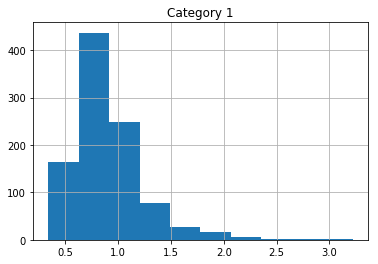

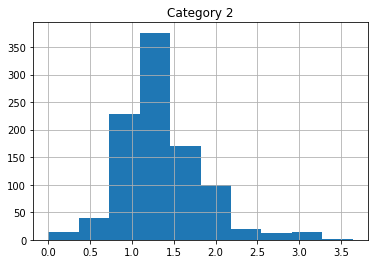

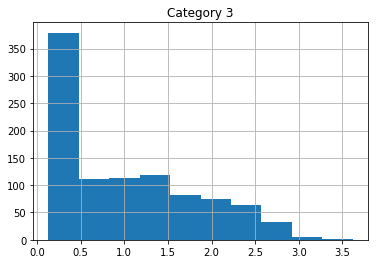

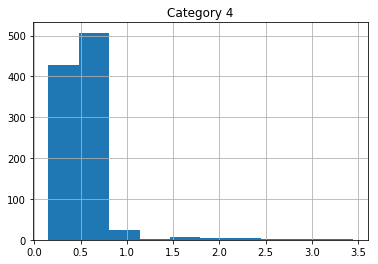

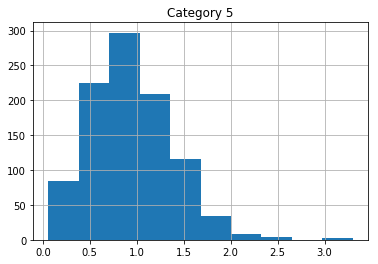

In [89]:
#??(question not listed in PDF): Plot the histograms for Categories 1 to 5 of the dataset.
for x in range(1,6):
    dataset.hist(dataset.columns[x])

In [90]:
#Question 2: Data Preprocessing

#1. Display the values of the attributes Category 1 and the User ID in a dataframe format. [5pts]
dataset[['User ID', 'Category 1']]

,User ID,Category 1
0,User 1,0.93
1,User 2,1.02
2,User 3,1.22
3,User 4,0.45
4,User 5,0.51
5,User 6,0.99
6,User 7,0.90
7,User 8,0.74
8,User 9,1.12
9,User 10,0.70


In [91]:
#2. Does the dataset have any special characters as values? If it does then replace them with NaN and drop the values.
for c in dataset:
    if c.isalpha():
        continue
    elif c.isdigit():
        continue
    else:    
        dataset = dataset.replace('c', np.nan)
dataset = dataset.dropna(axis=0, how="any")

In [99]:
#3. Scale the values of the last five category attributes using the sklearn min-max scaling function. Print out these values
df = pd.DataFrame(dataset)
df1 = df.tail()
df1 = df1.groupby(['User ID'])
df1 = df1.cumsum()
minmax_scale = preprocessing.MinMaxScaler().fit_transform(df1)
print(minmax_scale)

[[0.203125   0.82142857 0.17       1.         0.55769231 0.5
  0.         0.         0.         1.        ]
 [1.         0.64285714 0.99       0.         0.46153846 0.65306122
  1.         0.05       1.         0.5       ]
 [0.         1.         0.54       0.33333333 0.96153846 0.70408163
  0.         0.15       1.         0.775     ]
 [0.5        0.         0.         0.33333333 0.         0.
  1.         1.         0.37142857 0.075     ]
 [0.5        0.32142857 1.         0.86666667 1.         1.
  1.         0.45       1.         0.        ]]


<Figure size 432x288 with 0 Axes>

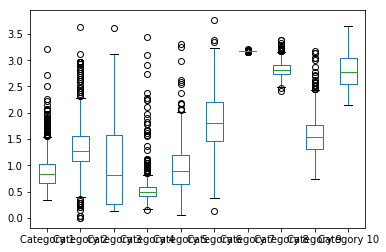

In [100]:
#Question 3: Data Visualization

#1. Plot the raw travel reviews dataset in the form of a box plot.
df = df.groupby(['User ID'])
df = df.cumsum()
plt.figure();
df.plot.box();


<Figure size 432x288 with 0 Axes>

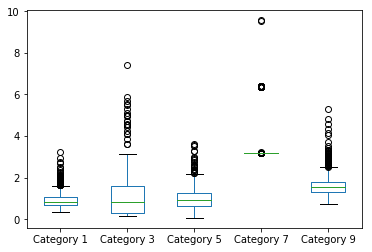

In [101]:
#2. Group the features to reduce the total number of categories from 10 to 5 and plot the new dataframe.
df2 = df.groupby(['Category 2', 'Category 4', 'Category 6', 'Category 8', 'Category 10'])
df2 = df2.cumsum()
plt.figure();
df2.plot.box();


<Figure size 432x288 with 0 Axes>

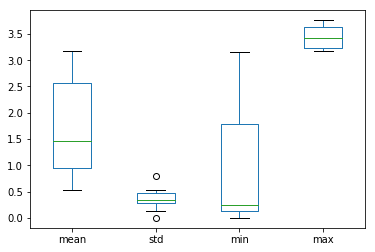

In [108]:
#3. Plot the mean, minimum, maximum, standard deviation values of each numerical attribute.

df3 = pd.DataFrame(dataset.describe())
df3_t = df3.T
df3_t = df3_t.groupby(['count', '25%', '50%', '75%'])
df3_t = df3_t.cumsum()
plt.figure();
df3_t.plot.box();

In [113]:
#Question 4: PCA

#1. Reduce the number of categroies from 10 to 3
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(df)
#where x represents all attributes of the iris dataset
principalDf = pd.DataFrame(data=principalComponents, columns=['principalcomponent1', 'principalcomponent2', 'principalcomponent3'])